In [ ]:

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

# Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
dataset = MNIST(root='./data', train=True, download=True, transform=transform)


The image, which is likely a 2D array (for a grayscale image), is flattened into a 1D vector. Each element in this vector represents a pixel in the image. For instance, if the image is 28x28 pixels (as in MNIST), it becomes a vector of 784 elements.

Each pixel is considered as a node in the graph

In [ ]:

# Create feature matrix and adjacency matrix for each image
def create_graph_representation(image):
    # Flatten the image pixels into a 1D vector
    features = image.view(-1)
    num_nodes = features.size(0)

    # Create adjacency matrix based on pixel connectivity
    adjacency_matrix = torch.eye(num_nodes)
    for i in range(num_nodes):
        if i % 28 != 0:
            adjacency_matrix[i, i-1] = 1  # Connect to left neighbor
        if (i+1) % 28 != 0:
            adjacency_matrix[i, i+1] = 1  # Connect to right neighbor
        if i >= 28:
            adjacency_matrix[i, i-28] = 1  # Connect to top neighbor
        if i < 28 * 27:
            adjacency_matrix[i, i+28] = 1  # Connect to bottom neighbor

    return features, adjacency_matrix

torch.eye(num_nodes) creates an identity matrix of size num_nodes x num_nodes. This step initializes the adjacency matrix so that, initially, each node is only connected to itself.

In [ ]:

# Create graph representations for a batch of images
def create_batch_graph_representations(batch_images):
    batch_features = []
    batch_adjacency_matrices = []
    for image in batch_images:
        features, adjacency_matrix = create_graph_representation(image)
        batch_features.append(features)
        batch_adjacency_matrices.append(adjacency_matrix)

    batch_features = torch.stack(batch_features)
    batch_adjacency_matrices = torch.stack(batch_adjacency_matrices)

    return batch_features, batch_adjacency_matrices

In [ ]:
pip install --upgrade networkx

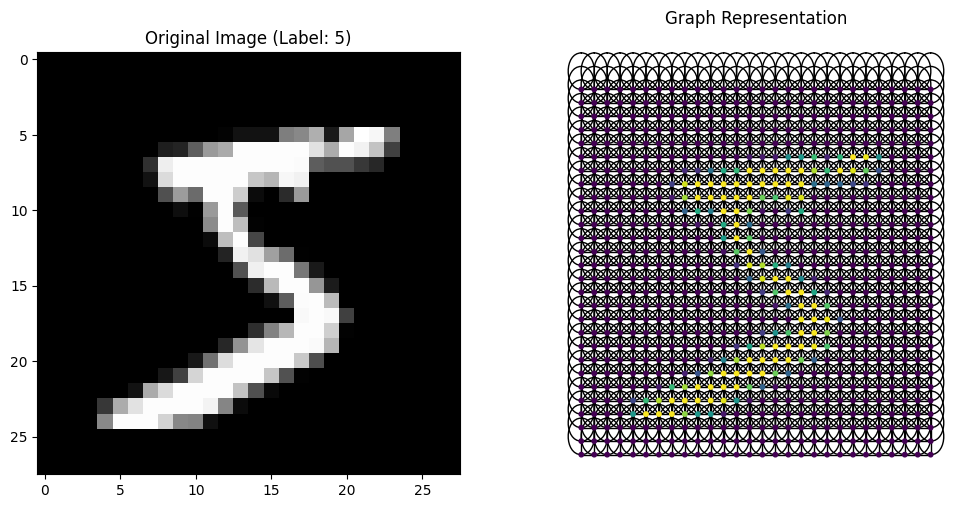

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
# Select an image
image, label = mnist_trainset[0]  # Change the index to select different images

# Create graph representation
features, adjacency_matrix = create_graph_representation(image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Original Image (Label: {label})")

# Create a graph from the adjacency matrix
# graph = nx.from_numpy_matrix(adjacency_matrix.numpy())
graph = nx.Graph()
rows, cols = np.where(adjacency_matrix == 1)
edges = zip(rows.tolist(), cols.tolist())
graph.add_edges_from(edges)

# Layout for graph visualization (simple grid layout)
pos = {i: (i % 28, 27 - i // 28) for i in range(28*28)}

# Visualize the graph
plt.subplot(1, 2, 2)
nx.draw(graph, pos, node_size=10, node_color=features.numpy())
plt.title("Graph Representation")
plt.show()

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
# Step 1: Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(mnist_trainset, batch_size=64, shuffle=True)

# Step 2: Iterate through batches and convert them
for batch_idx, (images, labels) in enumerate(trainloader):
    batch_features, batch_adjacency_matrices = create_batch_graph_representations(images)

    # For example, you can print the shape of features and adjacency matrices of the first batch
    if batch_idx == 0:
        print("Features shape:", batch_features.shape)
        print("Adjacency matrices shape:", batch_adjacency_matrices.shape)
        break

100%|██████████| 9912422/9912422 [00:00<00:00, 73114163.85it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 34267523.01it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 20890018.78it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8604574.87it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Features shape: torch.Size([64, 784])
Adjacency matrices shape: torch.Size([64, 784, 784])
